# --- 0. Initial Setup: Installations and Imports ---


In [12]:
!pip install ucimlrepo
!pip install graphviz
import os

In [13]:
!pip install ucimlrepo -q
!pip install graphviz -q

import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.impute import SimpleImputer

RANDOM_STATE = 42

# --- 1. Data Loading and Initial Preprocessing ---


In [14]:
print("--- 1. Data Loading and Initial Preprocessing ---")

# Fetch Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y_original = heart_disease.data.targets

print("\n--- Data Preprocessing ---")

# 1. Handle Missing Values
print("\nMissing values in X (BEFORE imputation):")
print(X.isnull().sum())

cols_with_nan = X.columns[X.isnull().any()].tolist()
if cols_with_nan:
    print(f"\nImputing missing values in columns: {cols_with_nan} using median.")
    imputer = SimpleImputer(strategy='median')
    X[cols_with_nan] = imputer.fit_transform(X[cols_with_nan])
    print("\nMissing values in X (AFTER imputation):")
    print(X.isnull().sum())
else:
    print("\nNo missing values found in X.")

# 2. Process Target Variable
y = y_original['num'].apply(lambda x: 0 if x == 0 else 1)

print("\n--- Dataset Information ---")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("\nFirst 5 rows of X (after imputation):")
print(X.head())
print("\nClass distribution in y (0: No Disease, 1: Disease):")
print(y.value_counts())

feature_names = X.columns.tolist()
class_names = ['No Disease', 'Disease']

--- 1. Data Loading and Initial Preprocessing ---

--- Data Preprocessing ---

Missing values in X (BEFORE imputation):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Imputing missing values in columns: ['ca', 'thal'] using median.

Missing values in X (AFTER imputation):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

--- Dataset Information ---
Shape of features (X): (303, 13)
Shape of target (y): (303,)

First 5 rows of X (after imputation):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1

/tmp/ipython-input-14-314426359.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_with_nan] = imputer.fit_transform(X[cols_with_nan])


# --- 2.1 Preparing the datasets ---




--- 2.1 Preparing the datasets ---

--- Performing Splits and Storing Datasets ---

Processing split: 40/60 (test_size=0.6)
  Shapes: X_train: (121, 13), y_train: (121,), X_test: (182, 13), y_test: (182,)
  y_train class distribution (normalized):
num
0    0.53719
1    0.46281
Name: proportion, dtype: float64
  y_test class distribution (normalized):
num
0    0.543956
1    0.456044
Name: proportion, dtype: float64

Processing split: 60/40 (test_size=0.4)
  Shapes: X_train: (181, 13), y_train: (181,), X_test: (122, 13), y_test: (122,)
  y_train class distribution (normalized):
num
0    0.541436
1    0.458564
Name: proportion, dtype: float64
  y_test class distribution (normalized):
num
0    0.540984
1    0.459016
Name: proportion, dtype: float64

Processing split: 80/20 (test_size=0.2)
  Shapes: X_train: (242, 13), y_train: (242,), X_test: (61, 13), y_test: (61,)
  y_train class distribution (normalized):
num
0    0.541322
1    0.458678
Name: proportion, dtype: float64
  y_test class 

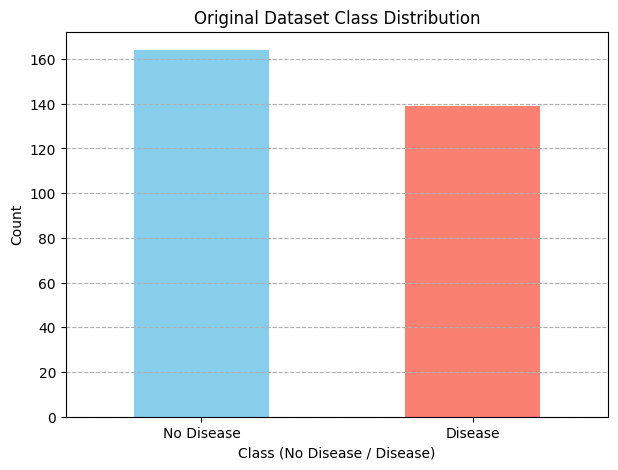

<Figure size 640x480 with 0 Axes>

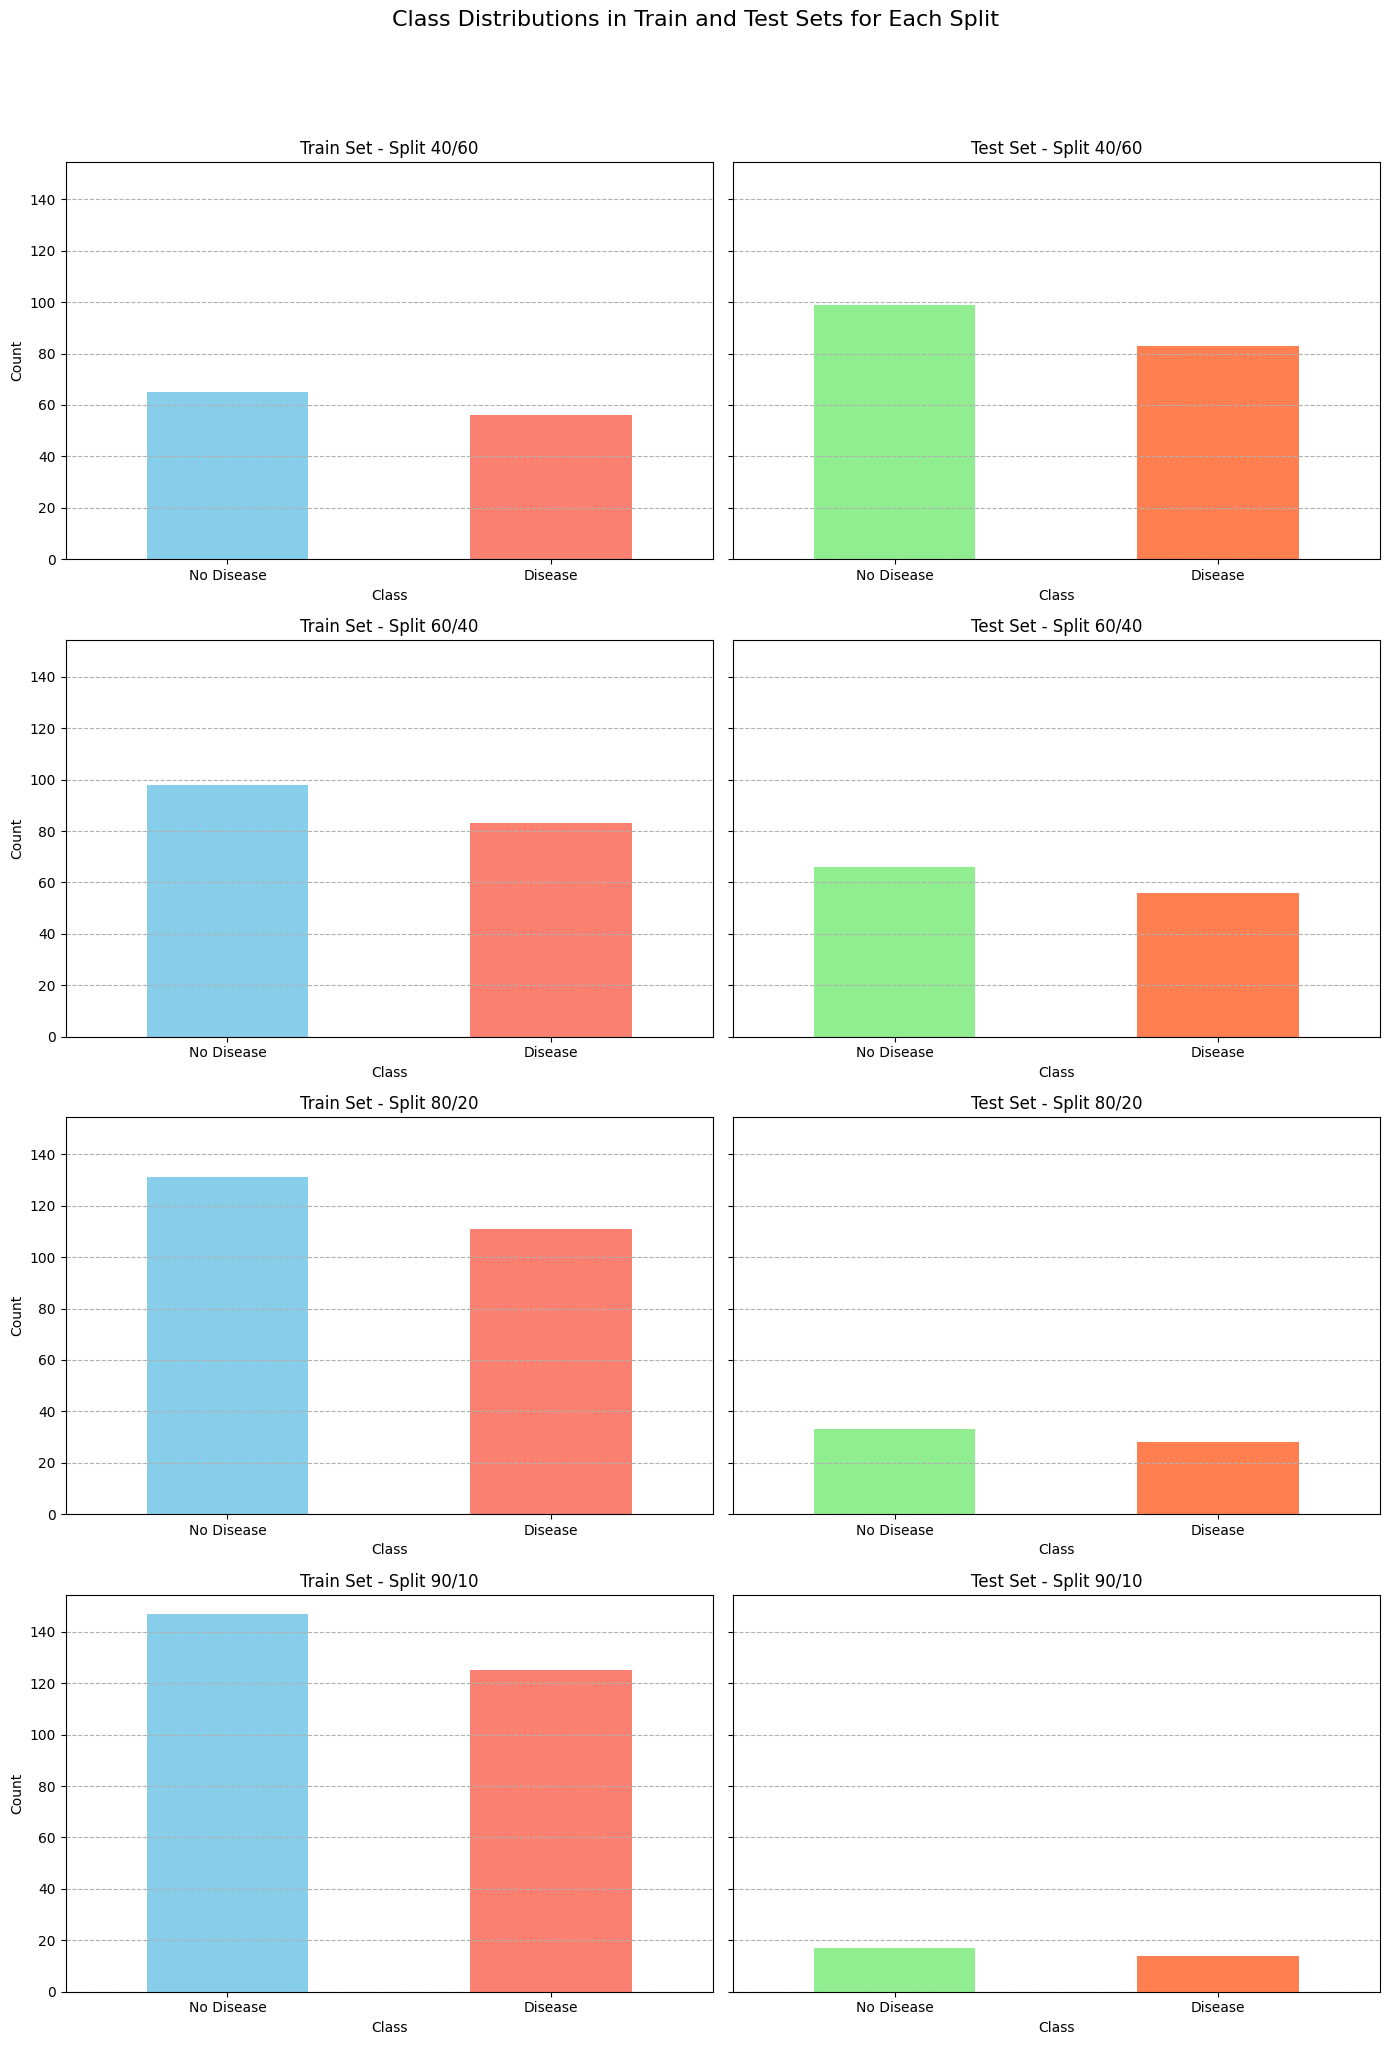

<Figure size 640x480 with 0 Axes>

In [15]:
print("\n\n--- 2.1 Preparing the datasets ---")
output_dir = 'figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


split_ratios_test_size = [0.6, 0.4, 0.2, 0.1]
split_ratios_display = ['40/60', '60/40', '80/20', '90/10']
datasets_storage = {}

print("\n--- Performing Splits and Storing Datasets ---")
for i, test_s in enumerate(split_ratios_test_size):
    split_key = split_ratios_display[i]
    print(f"\nProcessing split: {split_key} (test_size={test_s})")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_s, random_state=RANDOM_STATE, shuffle=True, stratify=y
    )
    datasets_storage[split_key] = {
        'X_train': X_train, 'y_train': y_train, 'X_test': X_test, 'y_test': y_test
    }
    print(f"  Shapes: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")
    print(f"  y_train class distribution (normalized):\n{y_train.value_counts(normalize=True)}")
    print(f"  y_test class distribution (normalized):\n{y_test.value_counts(normalize=True)}")

print("\n\n--- Visualizing Class Distributions ---")
plt.figure(figsize=(7, 5))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Original Dataset Class Distribution')
plt.xlabel(f'Class ({class_names[0]} / {class_names[1]})')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=class_names, rotation=0)
plt.grid(axis='y', linestyle='--'); plt.show()
plt.savefig(os.path.join(output_dir, 'original_class_distribution.png'), dpi=300, bbox_inches='tight')

num_splits = len(split_ratios_display)
fig, axes = plt.subplots(num_splits, 2, figsize=(14, 5 * num_splits), sharey=True)
fig.suptitle('Class Distributions in Train and Test Sets for Each Split', fontsize=16, y=1.02)
for i, split_key in enumerate(split_ratios_display):
    datasets_storage[split_key]['y_train'].value_counts().plot(kind='bar', ax=axes[i, 0], color=['skyblue', 'salmon'])
    axes[i, 0].set_title(f'Train Set - Split {split_key}'); axes[i, 0].set_xlabel('Class'); axes[i, 0].set_ylabel('Count')
    axes[i, 0].set_xticks(ticks=[0,1]); axes[i, 0].set_xticklabels(class_names, rotation=0); axes[i, 0].grid(axis='y', linestyle='--')

    datasets_storage[split_key]['y_test'].value_counts().plot(kind='bar', ax=axes[i, 1], color=['lightgreen', 'coral'])
    axes[i, 1].set_title(f'Test Set - Split {split_key}'); axes[i, 1].set_xlabel('Class'); axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_xticks(ticks=[0,1]); axes[i, 1].set_xticklabels(class_names, rotation=0); axes[i, 1].grid(axis='y', linestyle='--')
plt.tight_layout(rect=[0, 0, 1, 0.98]); plt.show()
plt.savefig(os.path.join(output_dir, 'train_test_class_distributions.png'), dpi=300, bbox_inches='tight')

# --- 2.2 Building the decision tree classifiers ---




--- 2.2 Building the decision tree classifiers ---

--- Training Decision Trees and Visualizing (displaying full depth) ---

Processing split: 40/60
  Decision Tree trained for split 40/60. Actual depth: 9
  Visualizing tree for split 40/60 (displaying full depth)...


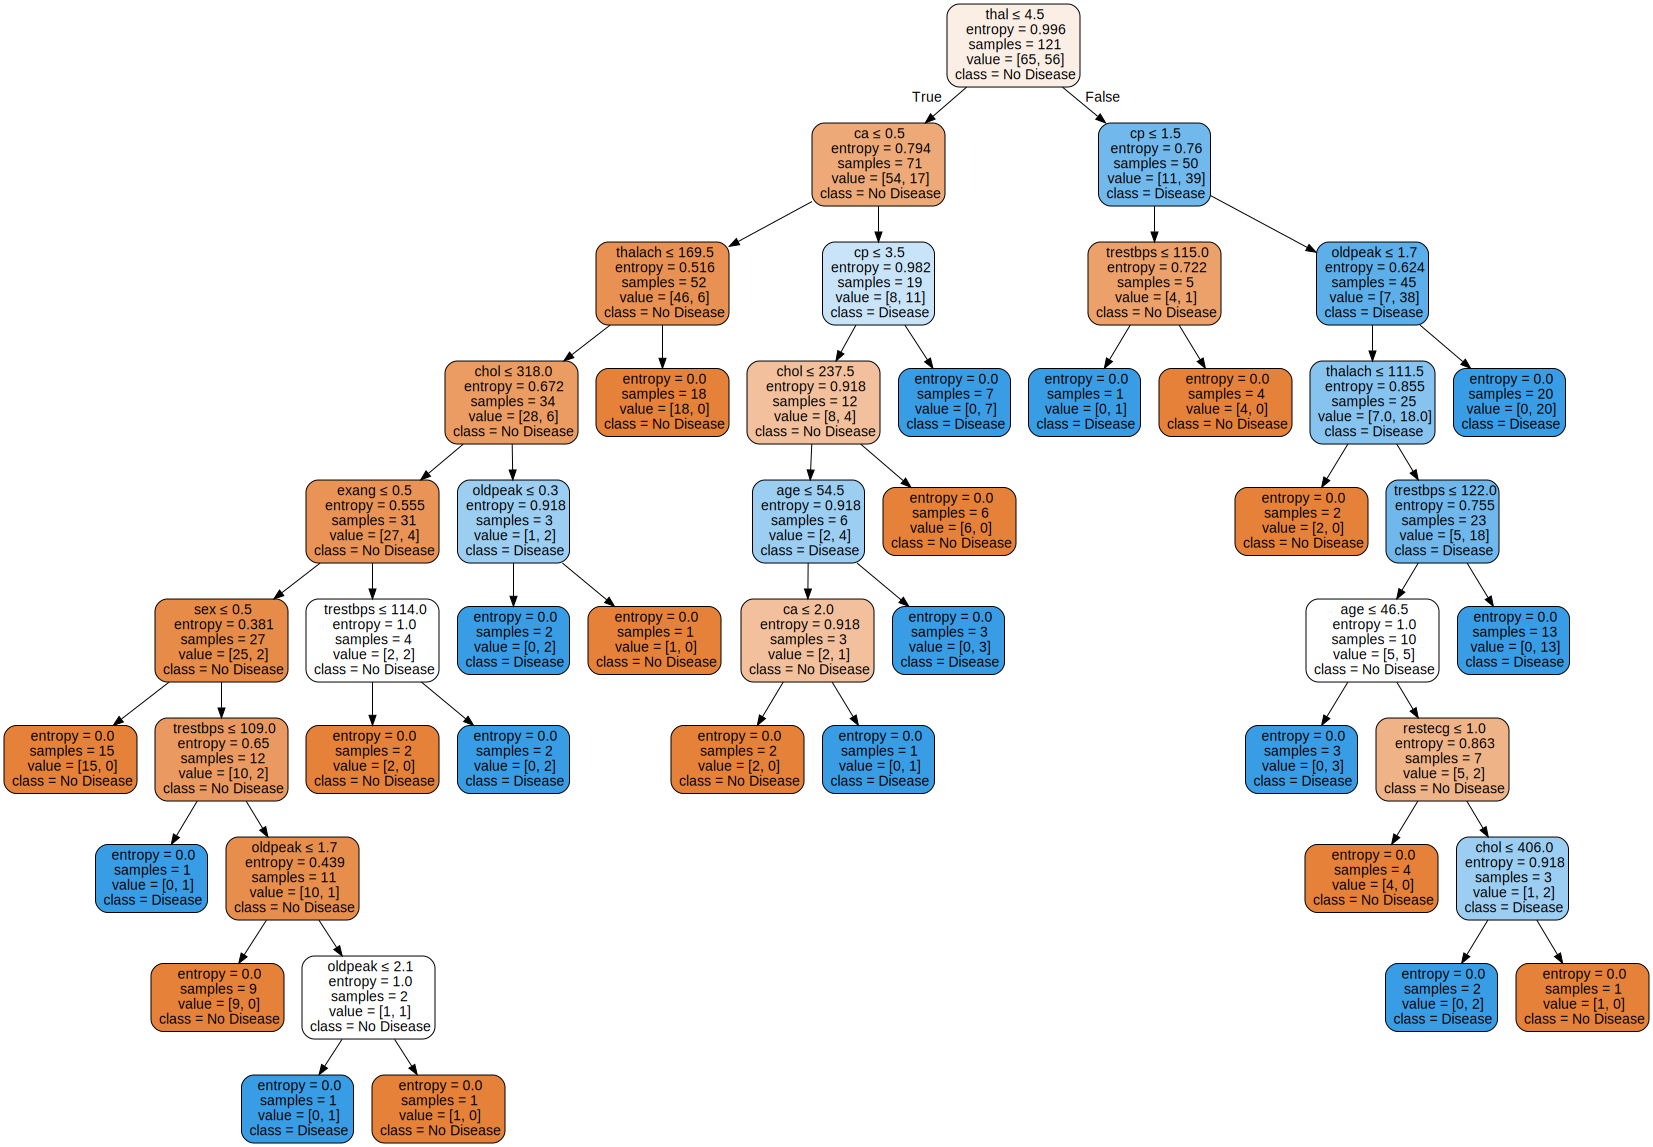


Processing split: 60/40
  Decision Tree trained for split 60/40. Actual depth: 7
  Visualizing tree for split 60/40 (displaying full depth)...


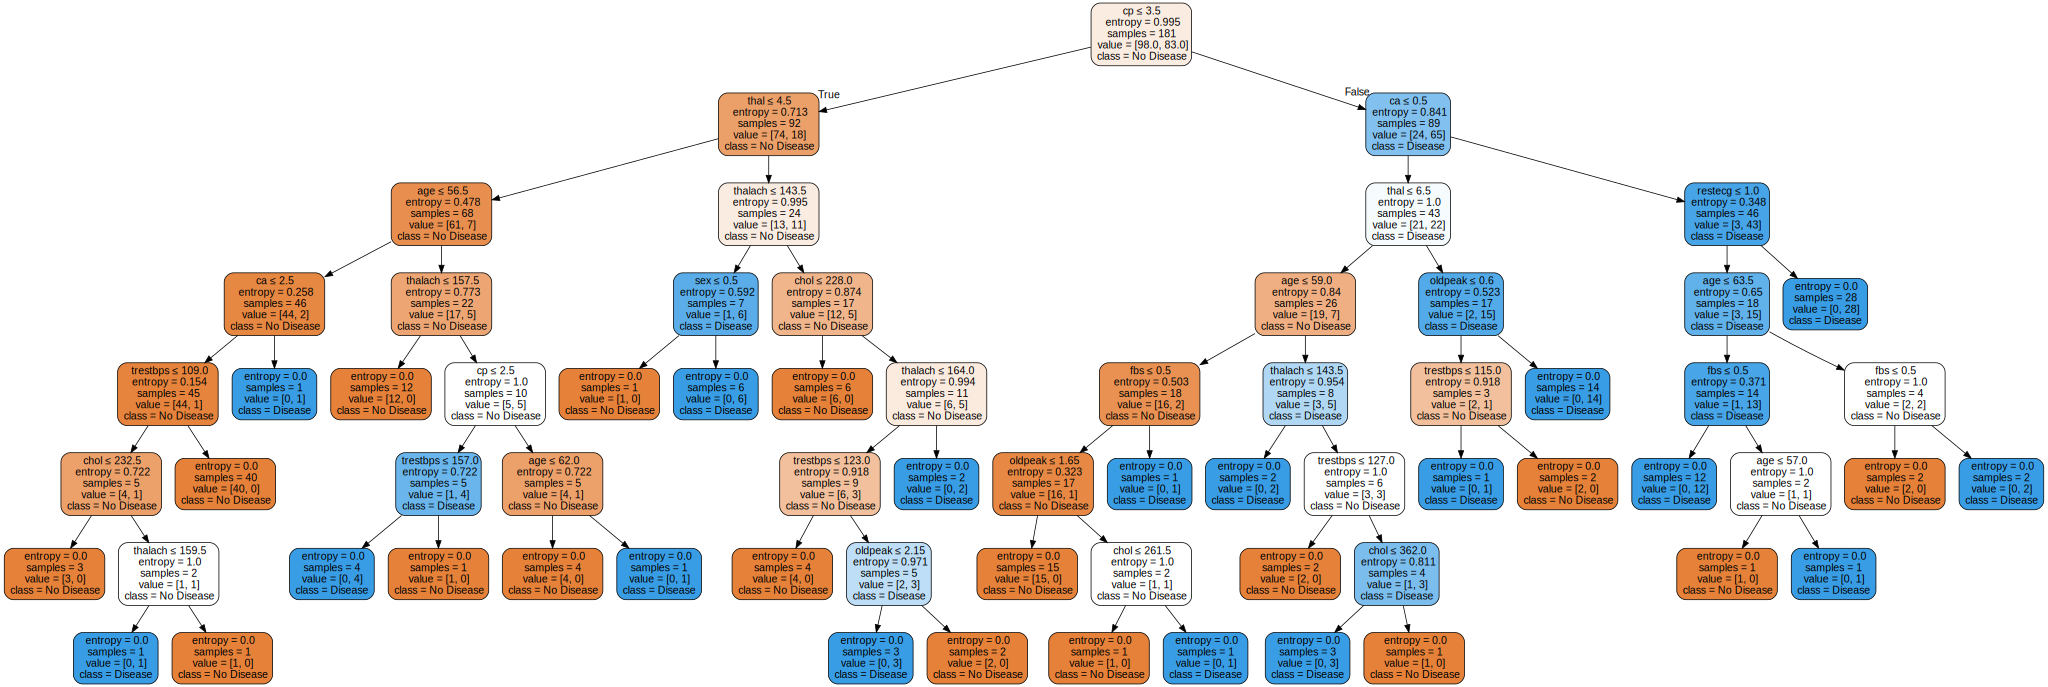


Processing split: 80/20
  Decision Tree trained for split 80/20. Actual depth: 10
  Visualizing tree for split 80/20 (displaying full depth)...


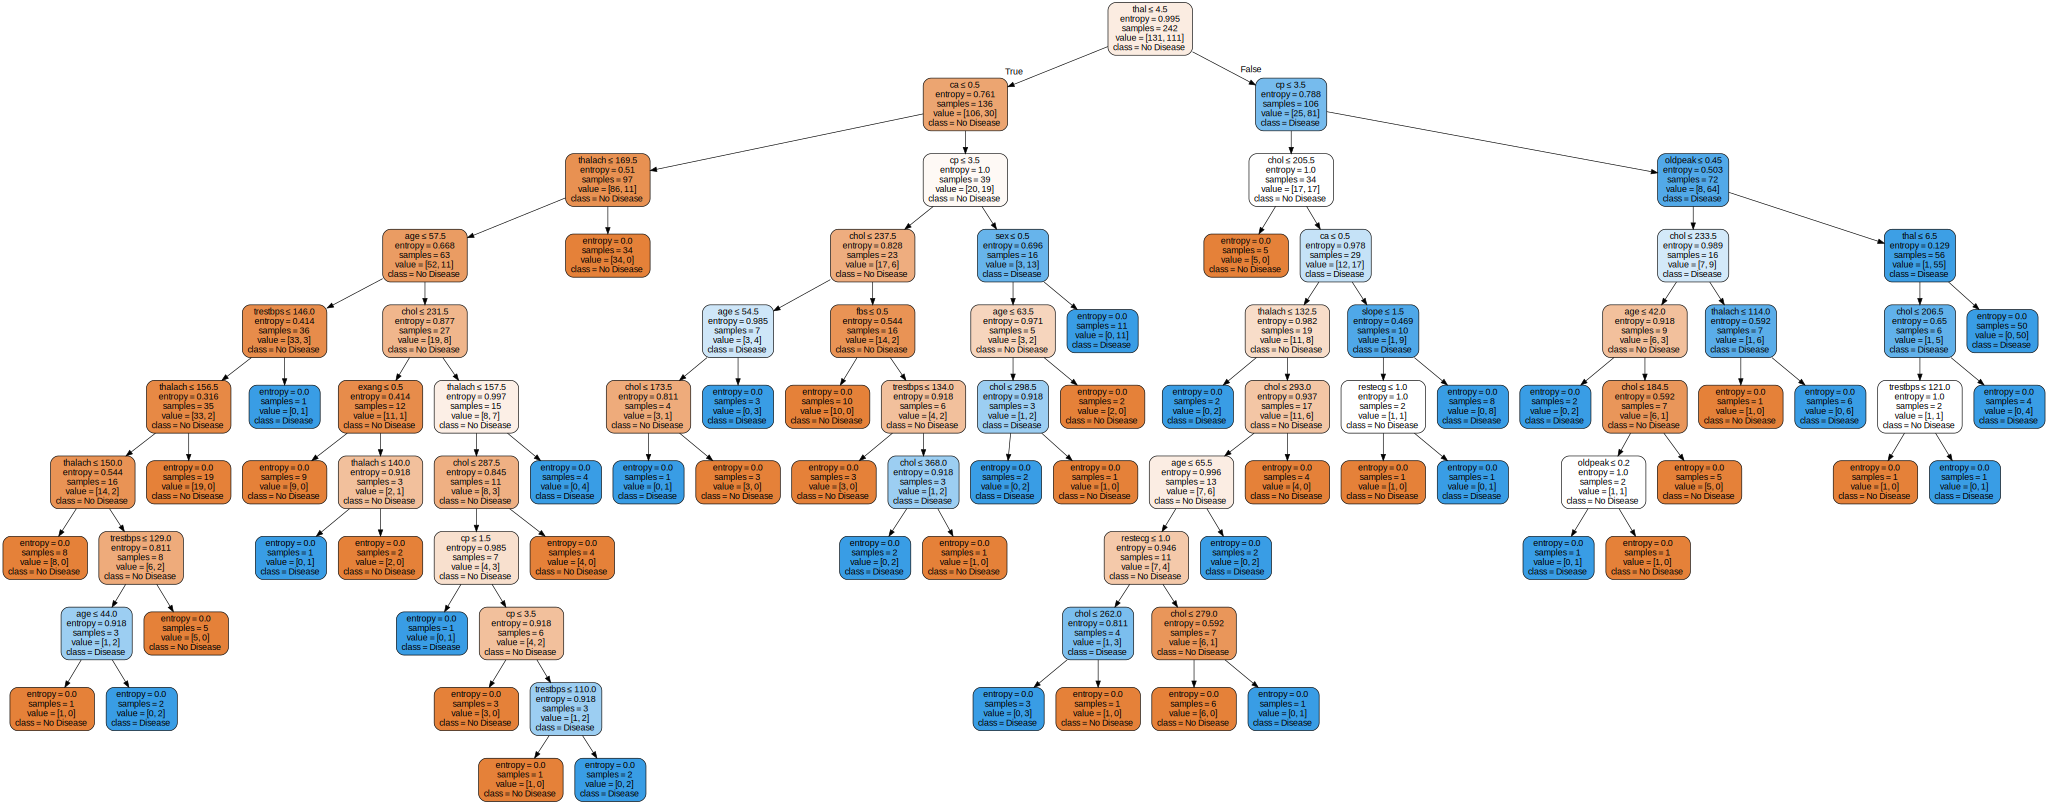


Processing split: 90/10
  Decision Tree trained for split 90/10. Actual depth: 10
  Visualizing tree for split 90/10 (displaying full depth)...


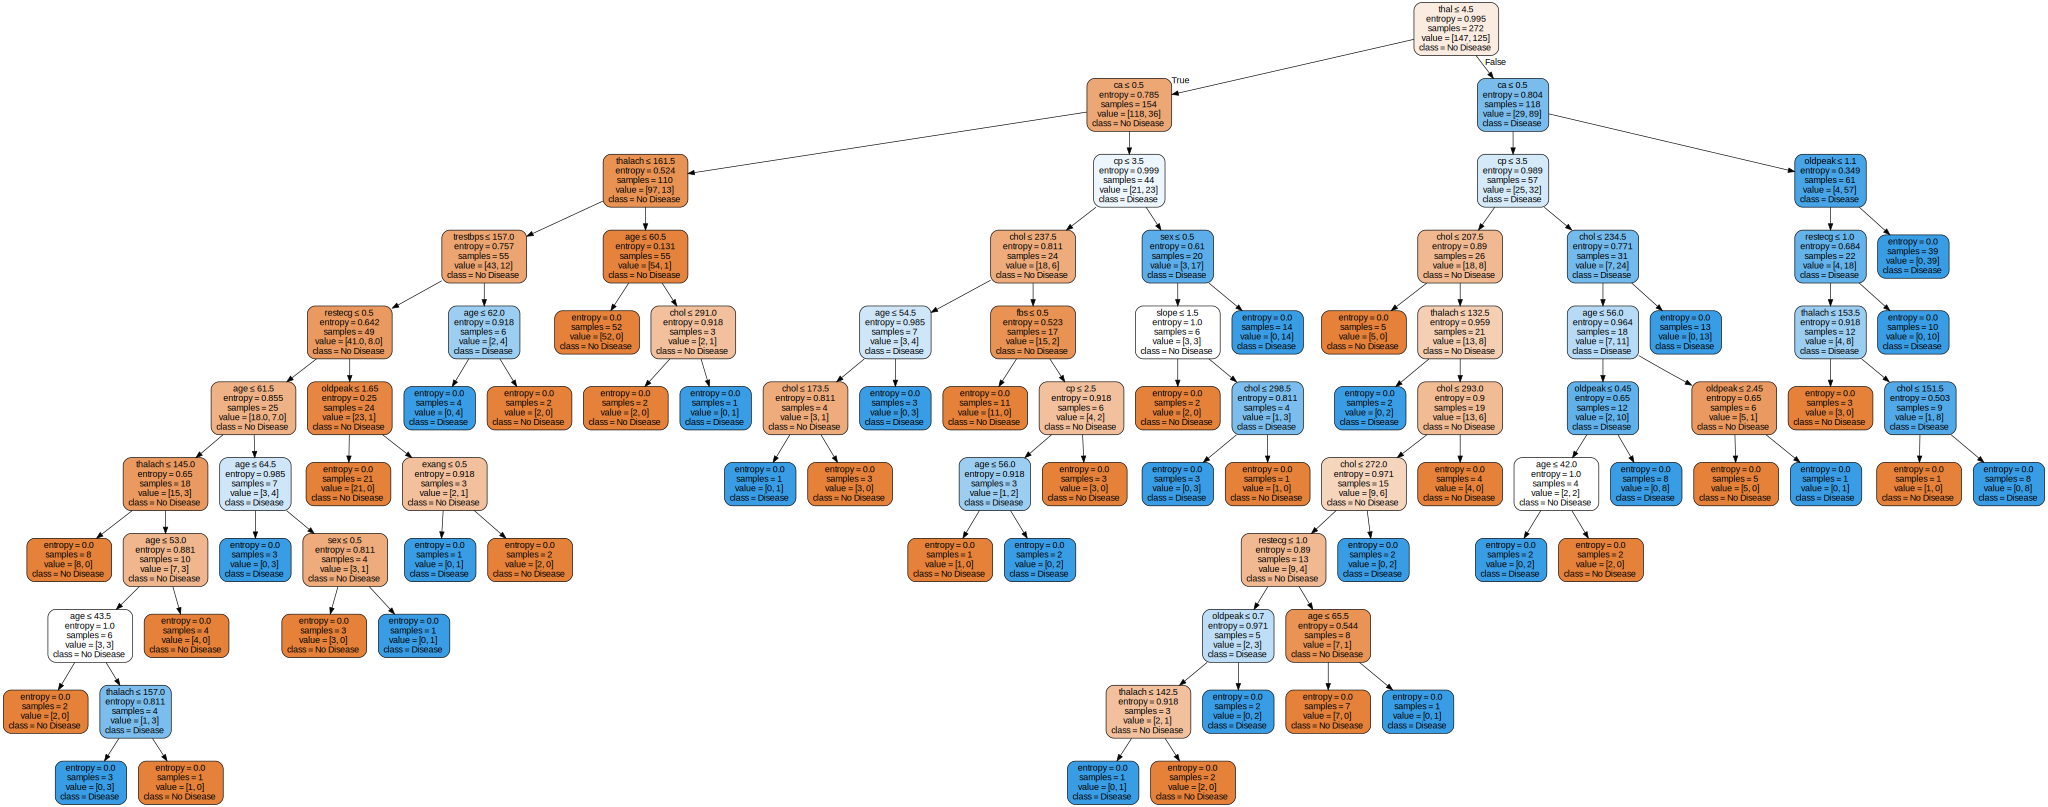

In [16]:
print("\n\n--- 2.2 Building the decision tree classifiers ---")
trained_classifiers = {}

print("\n--- Training Decision Trees and Visualizing (displaying full depth) ---")
for split_key in split_ratios_display:
    print(f"\nProcessing split: {split_key}")
    X_train, y_train = datasets_storage[split_key]['X_train'], datasets_storage[split_key]['y_train']

    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
    dt_classifier.fit(X_train, y_train)
    trained_classifiers[split_key] = dt_classifier
    print(f"  Decision Tree trained for split {split_key}. Actual depth: {dt_classifier.get_depth()}")

    print(f"  Visualizing tree for split {split_key} (displaying full depth)...")
    dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=feature_names, class_names=class_names,
                               filled=True, rounded=True, special_characters=True, max_depth=None)
    graph = graphviz.Source(dot_data)
    display(graph)
    graph.render(os.path.join(output_dir, f'decision_tree_{split_key.replace("/", "_")}'), format='png', cleanup=True)

# --- 2.3 Evaluating the decision tree classifiers ---




--- 2.3 Evaluating the decision tree classifiers ---

--- Evaluating Classifiers on Test Sets ---

--- Evaluation for Split: 40/60 ---

Classification Report:
              precision    recall  f1-score   support

  No Disease      0.775     0.697     0.734        99
     Disease      0.677     0.759     0.716        83

    accuracy                          0.725       182
   macro avg      0.726     0.728     0.725       182
weighted avg      0.731     0.725     0.726       182


Confusion Matrix:


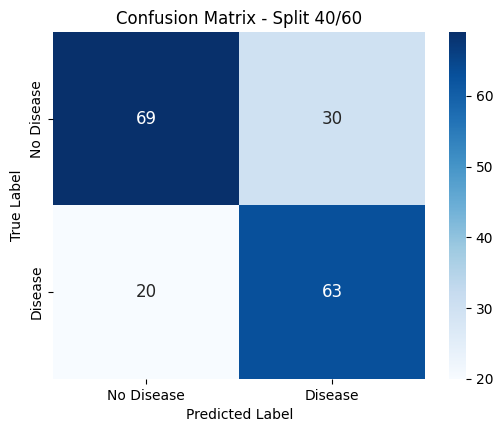

Accuracy for split 40/60: 0.7253

--- Evaluation for Split: 60/40 ---

Classification Report:
              precision    recall  f1-score   support

  No Disease      0.762     0.727     0.744        66
     Disease      0.695     0.732     0.713        56

    accuracy                          0.730       122
   macro avg      0.728     0.730     0.729       122
weighted avg      0.731     0.730     0.730       122


Confusion Matrix:


<Figure size 640x480 with 0 Axes>

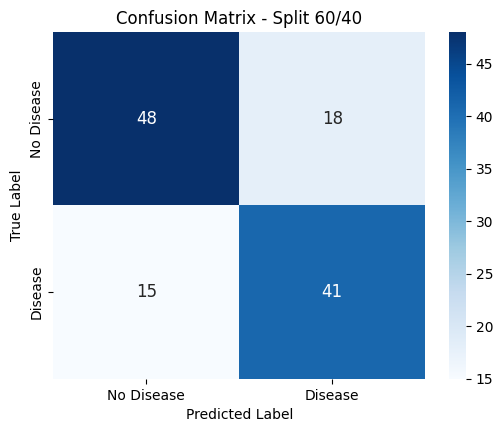

Accuracy for split 60/40: 0.7295

--- Evaluation for Split: 80/20 ---

Classification Report:
              precision    recall  f1-score   support

  No Disease      0.862     0.758     0.806        33
     Disease      0.750     0.857     0.800        28

    accuracy                          0.803        61
   macro avg      0.806     0.807     0.803        61
weighted avg      0.811     0.803     0.803        61


Confusion Matrix:


<Figure size 640x480 with 0 Axes>

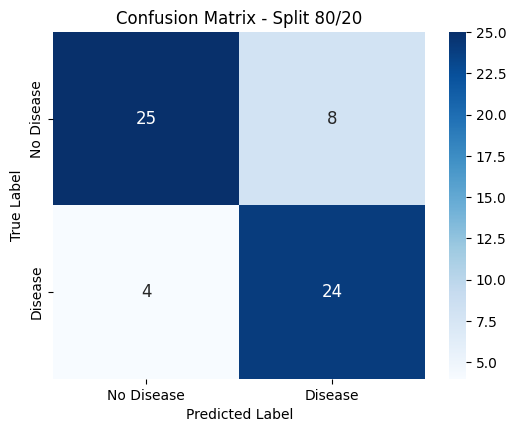

Accuracy for split 80/20: 0.8033

--- Evaluation for Split: 90/10 ---

Classification Report:
              precision    recall  f1-score   support

  No Disease      0.923     0.706     0.800        17
     Disease      0.722     0.929     0.812        14

    accuracy                          0.806        31
   macro avg      0.823     0.817     0.806        31
weighted avg      0.832     0.806     0.806        31


Confusion Matrix:


<Figure size 640x480 with 0 Axes>

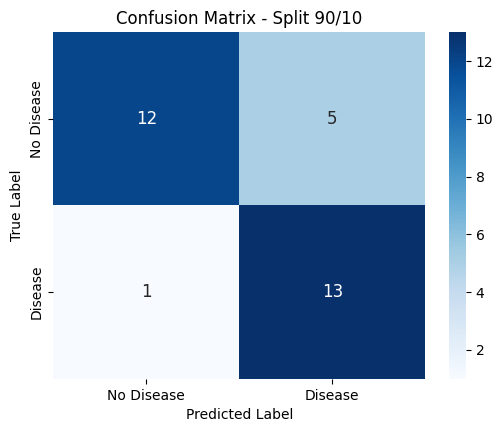

Accuracy for split 90/10: 0.8065


<Figure size 640x480 with 0 Axes>

In [17]:
print("\n\n--- 2.3 Evaluating the decision tree classifiers ---")
print("\n--- Evaluating Classifiers on Test Sets ---")
for split_key in split_ratios_display:
    print(f"\n--- Evaluation for Split: {split_key} ---")
    X_test, y_test = datasets_storage[split_key]['X_test'], datasets_storage[split_key]['y_test']
    classifier = trained_classifiers[split_key]
    y_pred = classifier.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names, digits=3))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})
    plt.title(f'Confusion Matrix - Split {split_key}'); plt.xlabel('Predicted Label'); plt.ylabel('True Label'); plt.show()
    plt.savefig(os.path.join(output_dir, f'confusion_matrix_{split_key.replace("/", "_")}.png'), dpi=300, bbox_inches='tight')
    print(f"Accuracy for split {split_key}: {accuracy_score(y_test, y_pred):.4f}")

# --- 2.4 The depth and accuracy of a decision tree (80/20 Split) ---




--- 2.4 The depth and accuracy of a decision tree (80/20 Split) ---

--- Training and Visualizing Trees with Different max_depth for 80/20 Split ---

Training tree with max_depth = None
  Accuracy: 0.8033, Actual tree depth achieved: 10
  Visualizing tree (displaying full trained depth: None)...


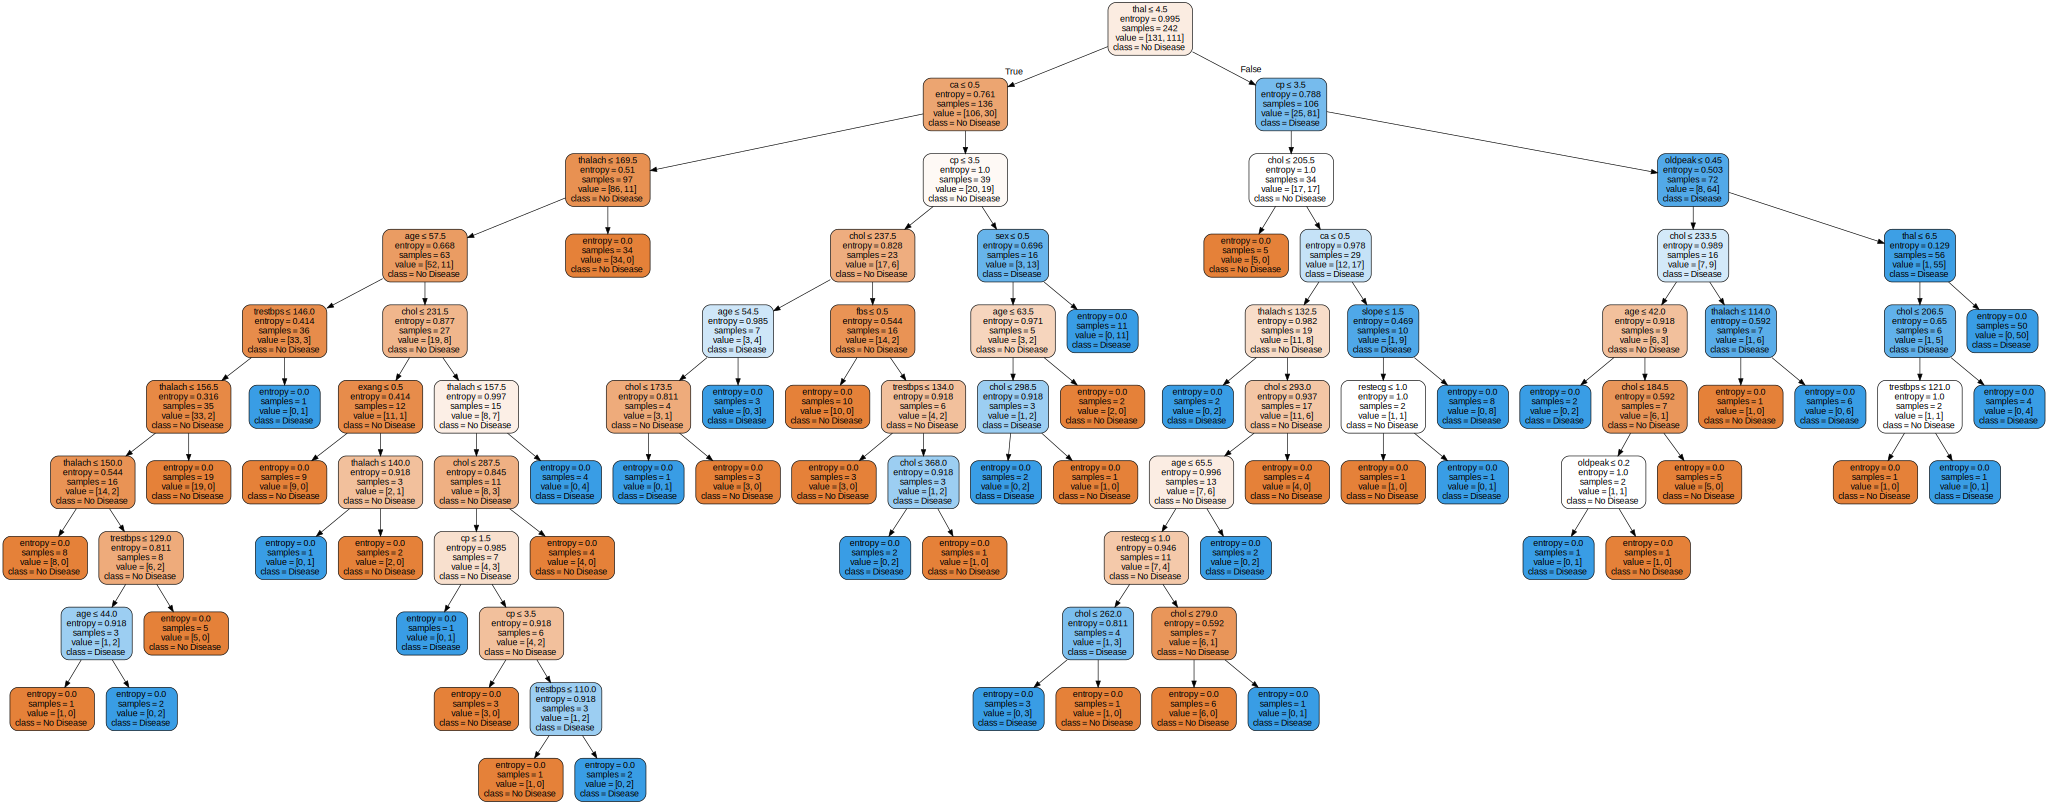


Training tree with max_depth = 2
  Accuracy: 0.7705, Actual tree depth achieved: 2
  Visualizing tree (displaying full trained depth: 2)...


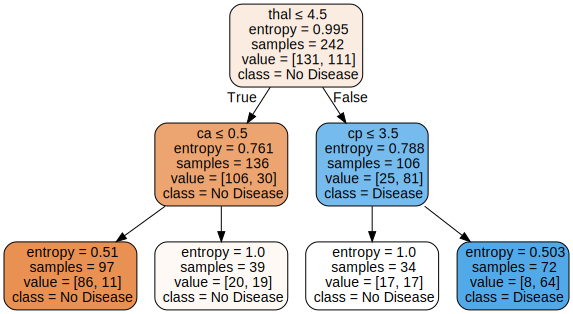


Training tree with max_depth = 3
  Accuracy: 0.8033, Actual tree depth achieved: 3
  Visualizing tree (displaying full trained depth: 3)...


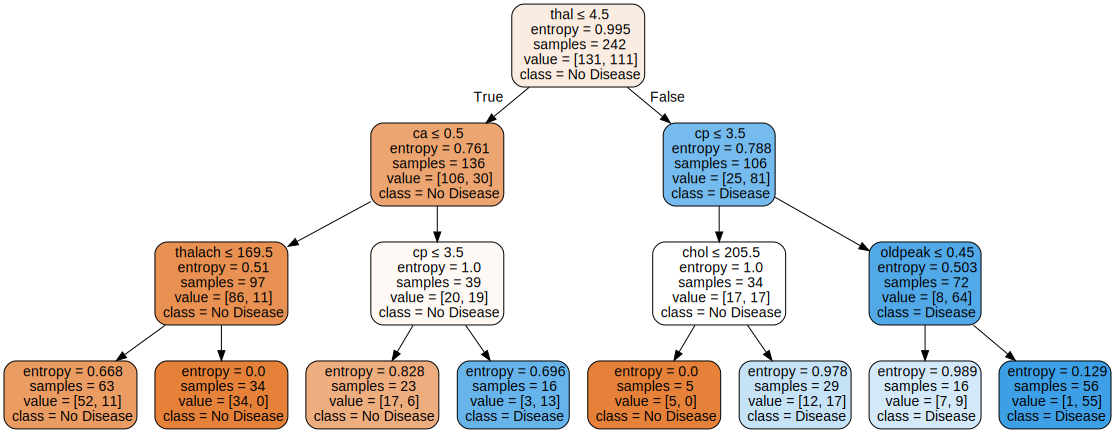


Training tree with max_depth = 4
  Accuracy: 0.7869, Actual tree depth achieved: 4
  Visualizing tree (displaying full trained depth: 4)...


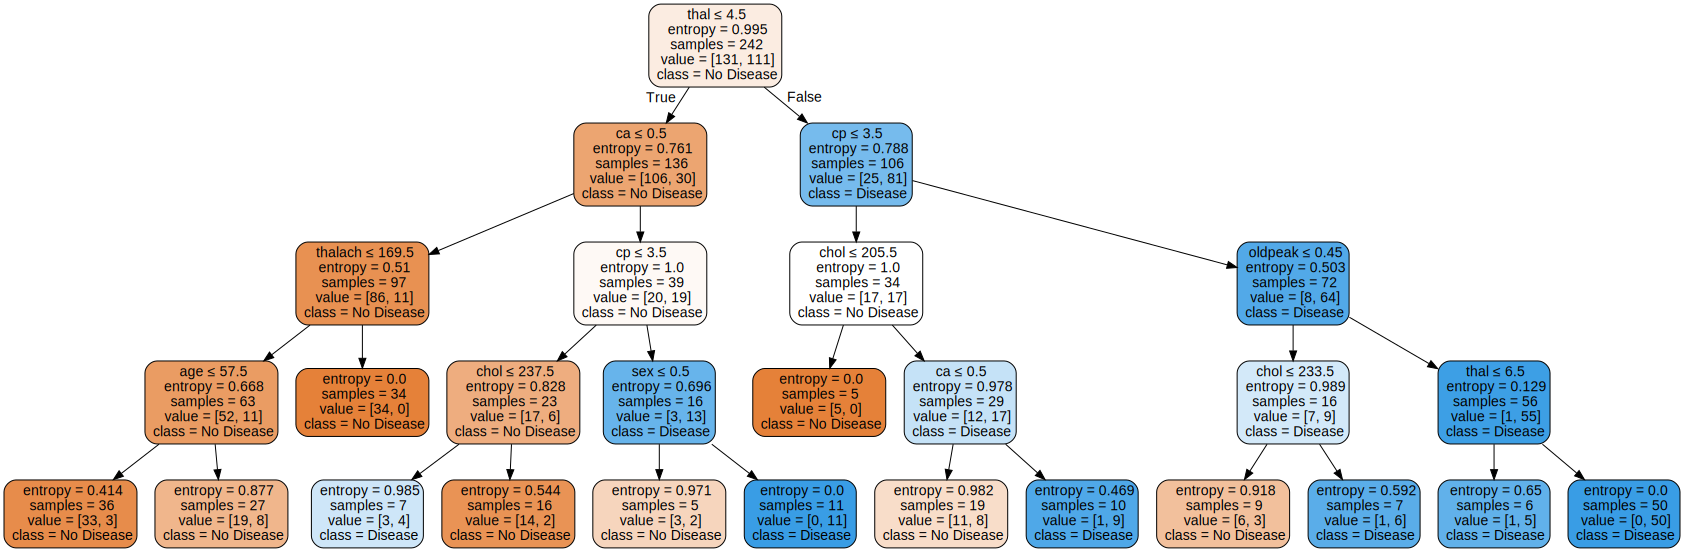


Training tree with max_depth = 5
  Accuracy: 0.7869, Actual tree depth achieved: 5
  Visualizing tree (displaying full trained depth: 5)...


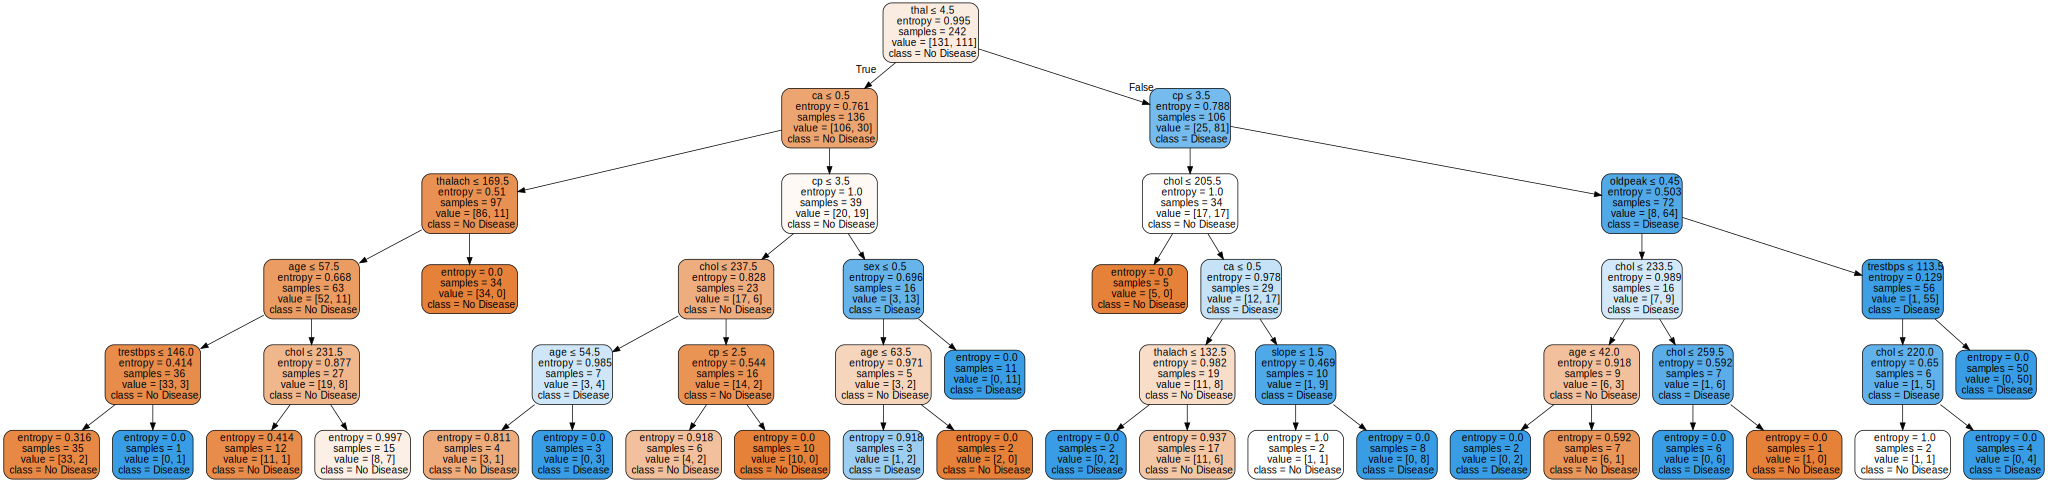


Training tree with max_depth = 6
  Accuracy: 0.7213, Actual tree depth achieved: 6
  Visualizing tree (displaying full trained depth: 6)...


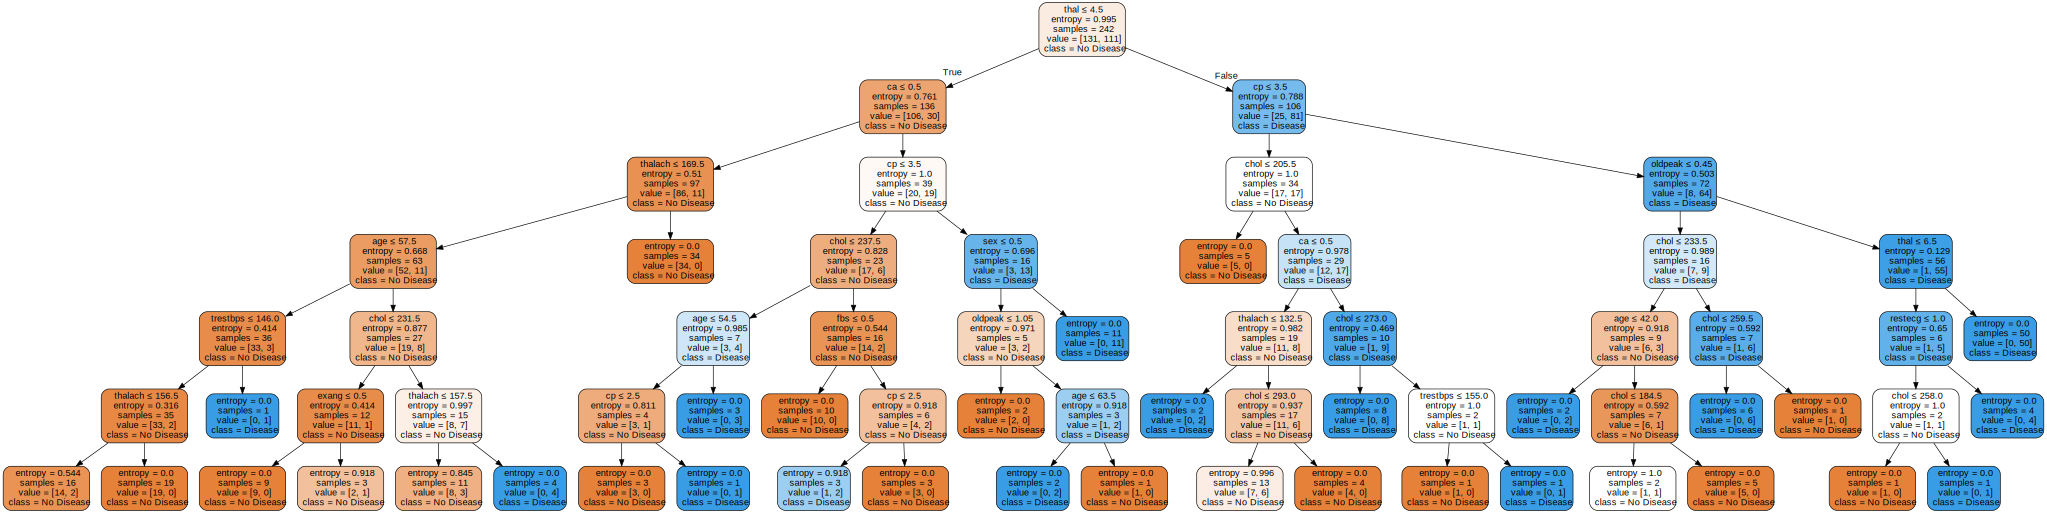


Training tree with max_depth = 7
  Accuracy: 0.7869, Actual tree depth achieved: 7
  Visualizing tree (displaying full trained depth: 7)...


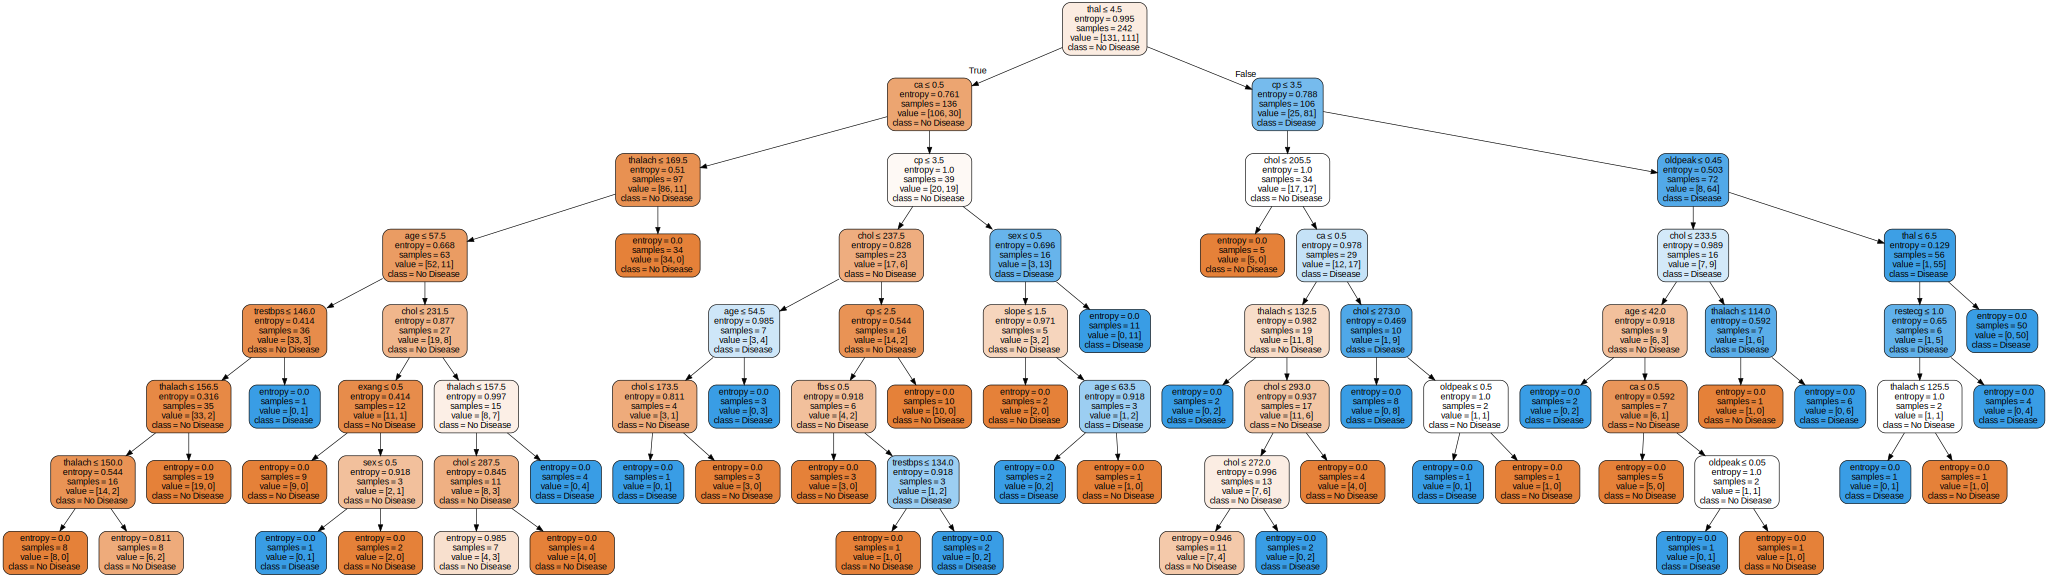



--- Accuracy Scores vs. max_depth (80/20 Split) ---
max_depth Accuracy
     None   0.8033
        2   0.7705
        3   0.8033
        4   0.7869
        5   0.7869
        6   0.7213
        7   0.7869


--- Chart: max_depth vs. Accuracy (80/20 Split) ---


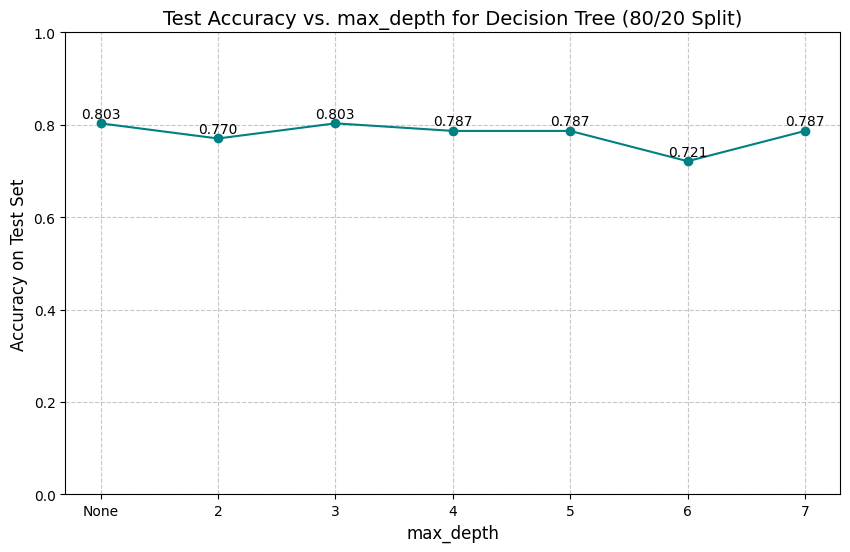



--- End of Heart Disease Dataset Analysis ---


In [18]:
print("\n\n--- 2.4 The depth and accuracy of a decision tree (80/20 Split) ---")
split_key_80_20 = '80/20'
if split_key_80_20 not in datasets_storage:
    print(f"Error: Split '{split_key_80_20}' not found.")
else:
    X_train_80_20, y_train_80_20 = datasets_storage[split_key_80_20]['X_train'], datasets_storage[split_key_80_20]['y_train']
    X_test_80_20, y_test_80_20 = datasets_storage[split_key_80_20]['X_test'], datasets_storage[split_key_80_20]['y_test']

    max_depth_values = [None, 2, 3, 4, 5, 6, 7]
    accuracy_scores_depth = []
    max_depth_display_values = ['None' if md is None else str(md) for md in max_depth_values]

    print(f"\n--- Training and Visualizing Trees with Different max_depth for {split_key_80_20} Split ---")
    for md_idx, md_param in enumerate(max_depth_values):
        display_md_label = max_depth_display_values[md_idx]
        print(f"\nTraining tree with max_depth = {display_md_label}")
        dt_clf_depth = DecisionTreeClassifier(criterion='entropy', max_depth=md_param, random_state=RANDOM_STATE)
        dt_clf_depth.fit(X_train_80_20, y_train_80_20)
        y_pred_depth = dt_clf_depth.predict(X_test_80_20)
        acc = accuracy_score(y_test_80_20, y_pred_depth)
        accuracy_scores_depth.append(acc)
        print(f"  Accuracy: {acc:.4f}, Actual tree depth achieved: {dt_clf_depth.get_depth()}")

        print(f"  Visualizing tree (displaying full trained depth: {display_md_label})...")
        dot_data_depth = export_graphviz(dt_clf_depth, out_file=None, feature_names=feature_names, class_names=class_names,
                                       filled=True, rounded=True, special_characters=True, max_depth=md_param) # Visualize with the trained depth
        graph_depth = graphviz.Source(dot_data_depth); display(graph_depth)

    print("\n\n--- Accuracy Scores vs. max_depth (80/20 Split) ---")
    accuracy_table = pd.DataFrame({'max_depth': max_depth_display_values,
                                   'Accuracy': [f"{acc:.4f}" for acc in accuracy_scores_depth]})
    print(accuracy_table.to_string(index=False))

    print("\n\n--- Chart: max_depth vs. Accuracy (80/20 Split) ---")
    plt.figure(figsize=(10, 6))
    x_ticks_positions = range(len(max_depth_values))
    plt.plot(x_ticks_positions, accuracy_scores_depth, marker='o', linestyle='-', color='teal')
    plt.title('Test Accuracy vs. max_depth for Decision Tree (80/20 Split)', fontsize=14)
    plt.xlabel('max_depth', fontsize=12); plt.ylabel('Accuracy on Test Set', fontsize=12)
    plt.xticks(x_ticks_positions, max_depth_display_values); plt.grid(True, linestyle='--', alpha=0.7)
    for i, acc_val in enumerate(accuracy_scores_depth):
        plt.text(x_ticks_positions[i], acc_val + 0.005, f"{acc_val:.3f}", ha='center', va='bottom')
    min_acc = min(accuracy_scores_depth) if accuracy_scores_depth else 0
    max_acc = max(accuracy_scores_depth) if accuracy_scores_depth else 1
    plt.ylim(min(0, min_acc - 0.05), max(1, max_acc + 0.05)); plt.show()
    graph_depth.render(os.path.join(output_dir, f'decision_tree_max_depth_{display_md_label}'), format='png', cleanup=True)

print("\n\n--- End of Heart Disease Dataset Analysis ---")